In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', error_bad_lines=False)
df.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
df['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
#Checking at which row and column password is null
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

password    0
strength    0
dtype: int64

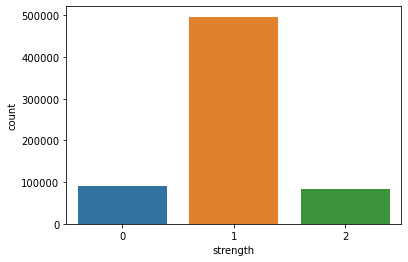

In [8]:
sns.countplot(df['strength'])

In [9]:
password_tuple = np.array(df)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [10]:
random.shuffle(password_tuple)

In [11]:
X = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [12]:
X

['kzde5577',
 'kzde5577',
 'visi7k1yr',
 'kino3434',
 'kino3434',
 'kino3434',
 'u6c8vhow',
 'u6c8vhow',
 'u6c8vhow',
 'lamborghin1',
 'as326159',
 'kino3434',
 'v1118714',
 'lamborghin1',
 'megzy123',
 'v1118714',
 'asv5o9yu',
 'AVYq1lDE4MgAZfNt',
 'g067057895',
 'as326159',
 '52558000aaa',
 'as326159',
 'sbl571017',
 'u6c8vhow',
 'AVYq1lDE4MgAZfNt',
 'AVYq1lDE4MgAZfNt',
 'cigicigi123',
 'intel1',
 'klara-tershina3H',
 '6975038lp',
 'jytifok873',
 'czuodhj972',
 'asv5o9yu',
 'v1118714',
 'trabajonet9',
 'memjan123',
 'faranumar91',
 'sbl571017',
 'klara-tershina3H',
 'universe2908',
 'kzde5577',
 'klara-tershina3H',
 'faranumar91',
 'asgaliu11',
 '6975038lp',
 'visi7k1yr',
 'faranumar91',
 'u6c8vhow',
 'v1118714',
 'gaymaids1',
 'universe2908',
 'kino3434',
 'schalke04',
 'kzde5577',
 'pHyqueDIyNQ8vmhb',
 'lsdlsd1',
 'universe2908',
 'klara-tershina3H',
 'tamanagung6',
 'klara-tershina3H',
 'c3h8bkzr',
 'gaymaids1',
 'u6c8vhow',
 'universe2908',
 'a2531106',
 'kino3434',
 'bgrvl80',
 

In [13]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,


In [14]:
#For converting string to characters
def string_to_char(input):
    char = []
    for i in input:
        char.append(i)
    return char

In [15]:
vectorizer = TfidfVectorizer(tokenizer=string_to_char)
X = vectorizer.fit_transform(X)

In [16]:
X.shape

(669639, 126)

In [17]:
vectorizer.get_feature_names()

['\x04',
 '\x05',
 '\x0e',
 '\x0f',
 '\x10',
 '\x16',
 '\x17',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ú',
 'û',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›',
 '™']

In [18]:
first_doc_vector = X[0]
first_doc_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56662832],
        [0.        ],
        [0.59167357],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [19]:
data = pd.DataFrame(first_doc_vector.T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
data

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
—,0.0
‚,0.0
‹,0.0
›,0.0


In [20]:
data.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591674
5,0.566628
z,0.335923
k,0.291976
d,0.285887
...,...
?,0.000000
>,0.000000
=,0.000000
<,0.000000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape

(535711, 126)

In [23]:
regressor = LogisticRegression(random_state=0, multi_class='multinomial')
regressor.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
cm = confusion_matrix(y_test, y_pred)
print('The confusion matrix is: \n',cm)
print('The accuracy is',accuracy_score(y_test, y_pred))

The confusion matrix is: 
 [[ 5225 12828    13]
 [ 3636 92956  2602]
 [   35  5062 11571]]
The accuracy is 0.819485096469745


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     18066
           1       0.84      0.94      0.89     99194
           2       0.82      0.69      0.75     16668

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [27]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)